In [452]:
import pandas as pd
import numpy as np
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from IPython.display import display
from geopy.distance import geodesic
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [453]:
beers = pd.read_csv("dataset/FilteredData/beers.csv")
breweries = pd.read_csv("dataset/FilteredData/breweries.csv")
ratings = pd.read_csv("dataset/FilteredData/ratings.csv", dtype = {'user_id': str})
users = pd.read_csv("dataset/FilteredData/users.csv", dtype = {'user_id': str})

STYLE MOST CONSUMED BY YEAR - ONLY 1

In [454]:
all_years_list = sorted(ratings['year'].unique())
style_popularities_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = False)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_most_popular = location_style_groupedby_loc['popularity_percentage'].idxmax()
    most_popular_styles_by_location = location_style.loc[idx_most_popular]
    most_popular_styles_by_location = most_popular_styles_by_location[['location', 'style']]
    most_popular_styles_by_location.set_index('location', inplace = True)
    most_popular_styles_by_location = most_popular_styles_by_location.rename(columns = {'style': str(year)})
    style_popularities_by_year = pd.concat([style_popularities_by_year, most_popular_styles_by_location], axis = 1)

style_popularities_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),American Pale Ale,American Pale Ale,India Pale Ale (IPA)
Belgium,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Ale,Belgian Ale,Belgian Ale,Imperial Stout
Brazil,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager
Canada,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),Pale Lager,American Pale Ale,Saison,Saison,Sour/Wild Ale
Croatia,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pilsener,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia",India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
"United States, Washington",India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
"United States, West Virginia",India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),Pale Lager,Saison


STYLE MOST CONSUMED BY YEAR - TOP 3

In [455]:
all_years_list = sorted(ratings['year'].unique())
style_popularities_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = False)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_most_popular = location_style_groupedby_loc.apply(lambda x: x.nlargest(3, 'popularity_percentage')).index.values
    idx_most_popular = [x[1] for x in idx_most_popular]
    most_popular_styles_by_location = location_style.loc[idx_most_popular]
    three_most_popular_styles_by_location = most_popular_styles_by_location.groupby('location')['style'].agg(list).to_frame()
    three_most_popular_styles_by_location = three_most_popular_styles_by_location.rename(columns = {'style': str(year)})
    style_popularities_by_year = pd.concat([style_popularities_by_year, three_most_popular_styles_by_location], axis = 1)
    
style_popularities_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,"[Pale Lager, Pilsener, Golden Ale/Blond Ale]","[Pale Lager, Pilsener, Golden Ale/Blond Ale]","[Pale Lager, Pilsener, Golden Ale/Blond Ale]","[Pale Lager, Golden Ale/Blond Ale, Pilsener]","[Pale Lager, Golden Ale/Blond Ale, American Pa...","[Pale Lager, American Pale Ale, Golden Ale/Blo...","[Pale Lager, American Pale Ale, Golden Ale/Blo...","[India Pale Ale (IPA), American Pale Ale, Pale...","[India Pale Ale (IPA), American Pale Ale, Pale...","[American Pale Ale, Pale Lager, Golden Ale/Blo...","[American Pale Ale, Pale Lager, Golden Ale/Blo...","[India Pale Ale (IPA), American Pale Ale, Pale..."
Belgium,"[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Pale Lager]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Ale, Belgian Strong Ale, Abbey Tripel]","[Belgian Ale, Belgian Strong Ale, Saison]","[Belgian Ale, Belgian Strong Ale, Abbey Tripel]","[Imperial Stout, Belgian Ale, Belgian Strong Ale]"
Brazil,"[Pale Lager, Pilsener, German Hefeweizen]","[Pale Lager, Belgian Strong Ale, Belgian Ale]","[Pale Lager, Pilsener, Belgian Strong Ale]","[Pale Lager, Pilsener, German Hefeweizen]","[Pale Lager, Belgian Strong Ale, Pilsener]","[Pale Lager, Belgian Strong Ale, Pilsener]","[Pale Lager, Belgian Strong Ale, Pilsener]","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, Golden Ale/Bl..."
Canada,"[Pale Lager, Golden Ale/Blond Ale, Fruit Beer]","[Pale Lager, Golden Ale/Blond Ale, Pilsener]","[Pale Lager, India Pale Ale (IPA), Belgian Str...","[Pale Lager, Belgian Strong Ale, Golden Ale/Bl...","[Pale Lager, Belgian Strong Ale, Golden Ale/Bl...","[Pale Lager, Golden Ale/Blond Ale, Spice/Herb/...","[India Pale Ale (IPA), Pale Lager, Belgian Str...","[Pale Lager, American Pale Ale, Saison]","[American Pale Ale, Saison, Pale Lager]","[Saison, American Pale Ale, Sour/Wild Ale]","[Saison, Sour/Wild Ale, American Pale Ale]","[Sour/Wild Ale, Saison, Stout]"
Croatia,"[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, Dunkel/Tmavý]","[Pilsener, Pale Lager, Dunkel/Tmavý]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Fruit Beer, Pilsener]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, German Hefeweizen]","[Pale Lager, Pilsener, American Pale Ale]","[Pale Lager, American Pale Ale, Pilsener]","[Pale Lager, American Pale Ale, Pilsener]"
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Porter, American Pale Ale]","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, Imperial ..."
"United States, Washington","[India Pale Ale (IPA), Imperial Stout, America...","[India Pale Ale (IPA), Porter, Imperial IPA]","[India Pale Ale (IPA), Imperial Stout, Belgian...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, American ...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Impe

STYLE HIGHEST RATED BY YEAR - ONLY 1

In [456]:
all_years_list = sorted(ratings['year'].unique())
style_ratings_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_highest_rated = location_style_groupedby_loc['z_score'].idxmax()
    highest_rated_styles_by_location = location_style.loc[idx_highest_rated]
    highest_rated_styles_by_location = highest_rated_styles_by_location[['location', 'style']]
    highest_rated_styles_by_location.set_index('location', inplace = True)
    highest_rated_styles_by_location = highest_rated_styles_by_location.rename(columns = {'style': str(year)})
    style_ratings_by_year = pd.concat([style_ratings_by_year, highest_rated_styles_by_location], axis = 1)

style_ratings_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Eisbock,Abt/Quadrupel,Lambic Style - Gueuze,Imperial Stout,Abt/Quadrupel
Belgium,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Abt/Quadrupel,Imperial Stout,American Strong Ale,Imperial Stout,Imperial Stout,Imperial Stout
Brazil,German Hefeweizen,Abt/Quadrupel,Abt/Quadrupel,Belgian Strong Ale,Imperial Stout,Lambic Style - Fruit,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abbey Tripel
Canada,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze
Croatia,Belgian Strong Ale,Porter,Abt/Quadrupel,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Abt/Quadrupel,Lambic Style - Fruit
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia",Abt/Quadrupel,Abt/Quadrupel,Sour Red/Brown,Lambic Style - Gueuze,Sour/Wild Ale,Lambic Style - Gueuze,Lambic Style - Unblended,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze
"United States, Washington",Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Sour Red/Brown,Lambic Style - Unblended,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze
"United States, West Virginia",Doppelbock,Imperial Stout,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Imperial Stout,Lambic Style - Fruit,Imperial Stout,Abt/Quadrupel


STYLE HIGHEST RATED BY YEAR - TOP 3

In [457]:
all_years_list = sorted(ratings['year'].unique())
style_ratings_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_highest_rated = location_style_groupedby_loc.apply(lambda x: x.nlargest(3, 'z_score')).index.values
    idx_highest_rated = [x[1] for x in idx_highest_rated]
    highest_rated_styles_by_location = location_style.loc[idx_highest_rated]
    three_highest_rated_styles_by_location = highest_rated_styles_by_location.groupby('location')['style'].agg(list).to_frame()
    three_highest_rated_styles_by_location = three_highest_rated_styles_by_location.rename(columns = {'style': str(year)})
    style_ratings_by_year = pd.concat([style_ratings_by_year, three_highest_rated_styles_by_location], axis = 1)
    
style_ratings_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,"[Abt/Quadrupel, Imperial IPA, Lambic Style - G...","[Abt/Quadrupel, Imperial Stout, Imperial IPA]","[Abt/Quadrupel, Imperial IPA, Imperial Stout]","[Abt/Quadrupel, Eisbock, Imperial Stout]","[Abt/Quadrupel, Imperial Stout, Eisbock]","[Abt/Quadrupel, Imperial Stout, American Stron...","[Abt/Quadrupel, American Strong Ale , Lambic S...","[Eisbock, Abt/Quadrupel, Lambic Style - Gueuze]","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Lambic Style - Gueuze, Weizen Bock, Abt/Quadr...","[Imperial Stout, Lambic Style - Gueuze, Abt/Qu...","[Abt/Quadrupel, Lambic Style - Gueuze, Old Ale]"
Belgium,"[Abt/Quadrupel, Lambic Style - Gueuze, Sour/Wi...","[Abt/Quadrupel, Imperial Stout, Imperial IPA]","[Abt/Quadrupel, Imperial Stout, Barley Wine]","[Abt/Quadrupel, Imperial Stout, Barley Wine]","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Lambic Style - Gueuze, Abt/Quadrupel, Imperia...","[Abt/Quadrupel, Imperial Stout, American Stron...","[Imperial Stout, Eisbock, Lambic Style - Unble...","[American Strong Ale , Imperial Stout, Imperia...","[Imperial Stout, Lambic Style - Gueuze, Americ...","[Imperial Stout, Mead, Imperial IPA]","[Imperial Stout, Baltic Porter, American Stron..."
Brazil,"[German Hefeweizen, Pilsener, Pale Lager]","[Abt/Quadrupel, Barley Wine, Belgian Strong Ale]","[Abt/Quadrupel, Imperial Stout, Belgian Strong...","[Belgian Strong Ale, Abbey Tripel, India Pale ...","[Imperial Stout, Belgian Strong Ale, Lambic St...","[Lambic Style - Fruit, Porter, Barley Wine]","[Abt/Quadrupel, Old Ale, Abbey Tripel]","[Abt/Quadrupel, Sour/Wild Ale, Belgian Strong ...","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Abt/Quadrupel, Imperial Stout, American Stron...","[Abt/Quadrupel, Imperial Stout, Sour Red/Brown]","[Abbey Tripel, Belgian Strong Ale, Abt/Quadrupel]"
Canada,"[Abt/Quadrupel, Lambic Style - Unblended, Impe...","[Abt/Quadrupel, Lambic Style - Unblended, Impe...","[Abt/Quadrupel, Imperial Stout, Sour/Wild Ale]","[Abt/Quadrupel, Lambic Style - Gueuze, Imperia...","[Abt/Quadrupel, Grodziskie/Gose/Lichtenhainer,...","[Abt/Quadrupel, Lambic Style - Unblended, Lamb...","[Lambic Style - Gueuze, Abt/Quadrupel, Lambic ...","[Abt/Quadrupel, Lambic Style - Gueuze, Imperia...","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Lambic Style - Gueuze, Imperial Stout, Abt/Qu...","[Lambic Style - Gueuze, Imperial Stout, Lambic...","[Lambic Style - Gueuze, Lambic Style - Unblend..."
Croatia,"[Belgian Strong Ale, Abbey Tripel, Abbey Dubbel]","[Porter, Belgian Strong Ale, Abbey Dubbel]","[Abt/Quadrupel, Imperial Stout, Baltic Porter]","[Imperial Stout, India Pale Ale (IPA), Belgian...","[Imperial Stout, India Pale Ale (IPA), Weizen ...","[Imperial Stout, Imperial IPA, Barley Wine]","[Imperial Stout, Barley Wine, Imperial IPA]","[Imperial Stout, Abbey Dubbel, Abbey Tripel]","[Imperial Stout, Weizen Bock, Abt/Quadrupel]","[Imperial Stout, Black IPA, Abt/Quadrupel]","[Abt/Quadrupel, Imperial Stout, American Stron...","[Lambic Style - Fruit, Imperial Stout, Lambic ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","[Abt/Quadrupel, Sour/Wild Ale, Eisbock]","[Abt/Quadrupel, Sour/Wild Ale, Imperial Stout]","[Sour Red/Brown, Abt/Quadrupel, Lambic Style -...","[Lambic Style - Gueuze, Sour Red/Brown, Imperi...","[Sour/Wild Ale, Weizen Bock, Lambic Style - Un...","[Lambic Style - Gueuze, Eisbock, Abt/Quadrupel]","[Lambic Style - Unblended, Lambic Style - Gueu...","[Lambic Style - Gueuze, Imperial Stout, Eisbock]","[Lambic Style - Gueuze, Lambic Style - Fruit, ...","[Lambic Style - Gueuze, Imperial Stout, Lambic...","[Lambic Style - Gueuze, Lambic Style - Fruit, ...","[Lambic Style - Gueuze, Lambic Style - Unblend..."
"United States, Washington","[Abt/Quadrupel, Imperial Stout, Eisbock]","[Abt/Quadrupel, Imperial Stout, Eisbock]","[Lambic Style - Gueuze, Sour Red/Brown, Sour/W...","[Sour Red/Brown, Lambic Style - U

BREWERY LOCATION MOST CONSUMED BY YEAR

In [458]:
all_years_list = sorted(ratings['year'].unique())
bc_popularities_by_year = pd.DataFrame()
for year in all_years_list:
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = False)
    location_bc_gb_loc = location_bc.groupby('location')
    idx_most_popular = location_bc_gb_loc['popularity_percentage'].idxmax()
    most_popular_bc_by_location = location_bc.loc[idx_most_popular]
    most_popular_bc_by_location = most_popular_bc_by_location[['location', 'brewery_location']]
    most_popular_bc_by_location.set_index('location', inplace = True)
    most_popular_bc_by_location = most_popular_bc_by_location.rename(columns = {'brewery_location': str(year)})
    bc_popularities_by_year = pd.concat([bc_popularities_by_year, most_popular_bc_by_location], axis = 1)
    
bc_popularities_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia
Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium
Brazil,Brazil,Belgium,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada
Croatia,Belgium,Belgium,Germany,Czech Republic,Germany,Germany,Germany,Germany,Germany,Germany,Croatia,Croatia
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, Virginia","United States, Virginia","United States, Virginia","United States, Virginia"
"United States, Washington","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, Washington","United States, Washington","United States, Washington"
"United States, West Virginia","United States, Pennsylvania","United States, Pennsylvania","United States, California","United States, New York","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, Ohio"


BREWERY LOCATION HIGHEST RATED BY YEAR

In [459]:
all_years_list = sorted(ratings['year'].unique())
bc_ratings_by_year = pd.DataFrame()
for year in all_years_list:
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = True)
    location_bc_gb_loc = location_bc.groupby('location')
    idx_highest_rated = location_bc_gb_loc['z_score'].idxmax()
    highest_rated_bc_by_location = location_bc.loc[idx_highest_rated]
    highest_rated_bc_by_location = highest_rated_bc_by_location[['location', 'brewery_location']]
    highest_rated_bc_by_location.set_index('location', inplace=True)
    highest_rated_bc_by_location = highest_rated_bc_by_location.rename(columns={'brewery_location': str(year)})
    bc_ratings_by_year = pd.concat([bc_ratings_by_year, highest_rated_bc_by_location], axis=1)
    
bc_ratings_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,"United States, California","United States, Colorado","United States, Oregon",Norway,Norway,"United States, Michigan","United States, Alaska",Norway,"United States, Vermont",Norway,"United States, Oklahoma","United States, Massachusetts"
Belgium,"United States, California","United States, California","United States, Michigan","United States, Georgia","United States, Oregon",Norway,"United States, Illinois","United States, Vermont","United States, Iowa","United States, Vermont","United States, South Carolina","United States, Ohio"
Brazil,Germany,Canada,"United States, California",Belgium,Belgium,"United States, California",Belgium,"United States, Indiana","United States, Florida","United States, Illinois","United States, Florida","United States, Massachusetts"
Canada,"United States, Alaska",Norway,Norway,Norway,Norway,Norway,"United States, Indiana","United States, Iowa","United States, Vermont","United States, Oklahoma","United States, Iowa","United States, Oklahoma"
Croatia,Belgium,Belgium,Belgium,England,Scotland,Sweden,Belgium,Scotland,Norway,Norway,Norway,"United States, Oregon"
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","United States, Connecticut","United States, Connecticut",Norway,Norway,"United States, Minnesota","United States, Alaska","United States, Alaska","United States, Iowa","United States, Iowa",Norway,Switzerland,"United States, Oklahoma"
"United States, Washington","United States, Connecticut",Norway,Norway,Norway,"United States, Indiana",Switzerland,Belgium,"United States, Iowa","United States, Iowa","United States, Vermont","United States, Iowa","United States, Wyoming"
"United States, West Virginia","United States, Ohio",Belgium,"United States, Michigan",Belgium,Belgium,Belgium,"United States, Michigan",Belgium,Belgium,"United States, Indiana",Belgium,"United States, Oregon"


GLOBAL TRENDS

STYLE MOST CONSUMED BY YEAR --- GLOBAL

In [460]:
all_years_list = sorted(ratings['year'].unique())
global_style_popularity_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    style_popularity_points_dict = {key: 0 for key in ratings['style'].unique().tolist()}
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = False, global_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_10_most_popular = location_style_groupedby_loc['popularity_percentage'].nlargest(10).index.get_level_values(1)
    most_popular_styles_by_location = location_style.loc[idx_10_most_popular]
    
    point_idx = 0
    prev_location = most_popular_styles_by_location.iloc[0]['location']
    for index, row in most_popular_styles_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        style_popularity_points_dict[row['style']] += points[point_idx]
        point_idx += 1
    global_style_popularity_points_by_year[str(year)] = style_popularity_points_dict

global_style_popularities_by_year = global_style_popularity_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_style_popularities_by_year_points = global_style_popularity_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T
tuple_list = {column: list(zip(global_style_popularities_by_year[column], global_style_popularities_by_year_points[column])) for column in global_style_popularities_by_year.columns}
global_style_popularities_by_year = pd.DataFrame(tuple_list, index = global_style_popularities_by_year.index)

global_style_popularities_by_year.columns = ['1st Most Popular', '2nd Most Popular', '3rd Most Popular', '4th Most Popular', '5th Most Popular', '6th Most Popular', '7th Most Popular', '8th Most Popular', '9th Most Popular', '10th Most Popular']
global_style_popularities_by_year.index.name = 'Year'
global_style_popularities_by_year

,1st Most Popular,2nd Most Popular,3rd Most Popular,4th Most Popular,5th Most Popular,6th Most Popular,7th Most Popular,8th Most Popular,9th Most Popular,10th Most Popular
Year,,,,,,,,,,
2006,"(Pilsener, 117)","(Pale Lager, 106)","(Belgian Strong Ale, 82)","(German Hefeweizen, 69)","(Golden Ale/Blond Ale, 66)","(Belgian Ale, 63)","(Premium Bitter/ESB, 62)","(Porter, 58)","(Bitter, 56)","(Dunkel/Tmavý, 52)"
2007,"(Pale Lager, 118)","(Pilsener, 102)","(Belgian Strong Ale, 78)","(Golden Ale/Blond Ale, 74)","(Bitter, 66)","(Porter, 66)","(German Hefeweizen, 66)","(India Pale Ale (IPA), 65)","(Belgian Ale, 64)","(Fruit Beer, 48)"
2008,"(Pale Lager, 108)","(Pilsener, 100)","(Belgian Strong Ale, 86)","(Imperial Stout, 75)","(Golden Ale/Blond Ale, 71)","(India Pale Ale (IPA), 68)","(Bitter, 66)","(Porter, 63)","(Belgian Ale, 60)","(Fruit Beer, 55)"
2009,"(Pilsener, 108)","(India Pale Ale (IPA), 82)","(Pale Lager, 80)","(Belgian Strong Ale, 64)","(Porter, 62)","(Belgian Ale, 62)","(Imperial Stout, 61)","(Golden Ale/Blond Ale, 53)","(Premium Bitter/ESB, 49)","(American Pale Ale, 48)"
2010,"(Pale Lager, 136)","(Belgian Strong Ale, 81)","(Pilsener, 78)","(India Pale Ale (IPA), 76)","(Imperial Stout, 76)","(Porter, 66)","(Golden Ale/Blond Ale, 64)","(German Hefeweizen, 56)","(Bitter, 51)","(Imperial IPA, 50)"
2011,"(Pale Lager, 134)","(India Pale Ale (IPA), 100)","(Pilsener, 93)","(Imperial Stout, 85)","(Belgian Strong Ale, 84)","(Porter, 66)","(Golden Ale/Blond Ale, 65)","(German Hefeweizen, 64)","(Bitter, 60)","(Belgian Ale, 59)"
2012,"(India Pale Ale (IPA), 112)","(Pale Lager, 104)","(Imperial Stout, 93)","(American Pale Ale, 88)","(Belgian Strong Ale, 84)","(Pilsener, 78)","(Belgian Ale, 78)","(Porter, 77)","(Imperial IPA, 58)","(Golden Ale/Blond Ale, 51)"
2013,"(India Pale Ale (IPA), 116)","(American Pale Ale, 109)","(Pale Lager, 95)","(Imperial Stout, 93)","(Pilsener, 83)","(Belgian Strong Ale, 77)","(Porter, 67)","(Golden Ale/Blond Ale, 59)","(Belgian Ale, 58)","(Imperial IPA, 50)"
2014,"(India Pale Ale (IPA), 154)","(American Pale Ale, 110)","(Pale Lager, 99)","(Imperial Stout, 79)","(Belgian Strong Ale, 74)","(Porter, 69)","(Golden Ale/Blond Ale, 64)","(Saison, 63)","(Belgian Ale, 63)","(Pilsener, 59)"


STYLE HIGHEST RATED BY YEAR --- GLOBAL

In [461]:
all_years_list = sorted(ratings['year'].unique())
global_style_rating_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    style_rating_points_dict = {key: 0 for key in ratings['style'].unique().tolist()}
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = True, global_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_10_highest_rated = location_style_groupedby_loc['z_score'].nlargest(10).index.get_level_values(1)
    highest_rated_styles_by_location = location_style.loc[idx_10_highest_rated]
    
    point_idx = 0
    prev_location = highest_rated_styles_by_location.iloc[0]['location']
    for index, row in highest_rated_styles_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        style_rating_points_dict[row['style']] += points[point_idx]
        point_idx += 1
    global_style_rating_points_by_year[str(year)] = style_rating_points_dict

global_style_highest_rated_by_year = global_style_rating_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_style_highest_rated_by_year_points = global_style_rating_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T

tuple_list = {column: list(zip(global_style_highest_rated_by_year[column], global_style_highest_rated_by_year_points[column])) for column in global_style_highest_rated_by_year.columns}
global_style_highest_rated_by_year = pd.DataFrame(tuple_list, index = global_style_highest_rated_by_year.index)

global_style_highest_rated_by_year.columns = ['1st Highest Rated', '2nd Highest Rated', '3rd Highest Rated', '4th Highest Rated', '5th Highest Rated', '6th Highest Rated', '7th Highest Rated', '8th Highest Rated', '9th Highest Rated', '10th Highest Rated']
global_style_highest_rated_by_year.index.name = 'Year'
global_style_highest_rated_by_year

,1st Highest Rated,2nd Highest Rated,3rd Highest Rated,4th Highest Rated,5th Highest Rated,6th Highest Rated,7th Highest Rated,8th Highest Rated,9th Highest Rated,10th Highest Rated
Year,,,,,,,,,,
2006,"(Imperial Stout, 112)","(Abt/Quadrupel, 111)","(Belgian Strong Ale, 108)","(Imperial IPA, 82)","(Lambic Style - Gueuze, 57)","(Baltic Porter, 47)","(Abbey Tripel, 39)","(Sour/Wild Ale, 38)","(Belgian Ale, 37)","(American Strong Ale , 37)"
2007,"(Abt/Quadrupel, 158)","(Imperial Stout, 154)","(Belgian Strong Ale, 110)","(Imperial IPA, 85)","(Barley Wine, 57)","(Sour Red/Brown, 52)","(Porter, 51)","(American Strong Ale , 50)","(Sour/Wild Ale, 40)","(Lambic Style - Gueuze, 40)"
2008,"(Imperial Stout, 204)","(Abt/Quadrupel, 148)","(Imperial IPA, 119)","(Belgian Strong Ale, 99)","(Sour/Wild Ale, 79)","(Barley Wine, 72)","(Lambic Style - Gueuze, 55)","(Abbey Tripel, 52)","(India Pale Ale (IPA), 45)","(Baltic Porter, 45)"
2009,"(Imperial Stout, 188)","(Abt/Quadrupel, 141)","(Imperial IPA, 100)","(Sour Red/Brown, 79)","(Barley Wine, 72)","(Belgian Strong Ale, 65)","(Sour/Wild Ale, 58)","(Lambic Style - Gueuze, 58)","(American Strong Ale , 51)","(India Pale Ale (IPA), 45)"
2010,"(Imperial Stout, 204)","(Abt/Quadrupel, 156)","(Imperial IPA, 81)","(Lambic Style - Unblended, 81)","(Belgian Strong Ale, 63)","(American Strong Ale , 63)","(Sour Red/Brown, 52)","(Lambic Style - Gueuze, 49)","(Abbey Tripel, 47)","(Black IPA, 45)"
2011,"(Imperial Stout, 196)","(Abt/Quadrupel, 152)","(Imperial IPA, 132)","(Lambic Style - Gueuze, 93)","(Lambic Style - Unblended, 67)","(American Strong Ale , 58)","(Barley Wine, 56)","(Belgian Strong Ale, 48)","(Sour/Wild Ale, 47)","(Black IPA, 43)"
2012,"(Imperial Stout, 193)","(Abt/Quadrupel, 179)","(Imperial IPA, 137)","(Lambic Style - Gueuze, 118)","(Black IPA, 72)","(American Strong Ale , 72)","(Sour/Wild Ale, 60)","(Barley Wine, 53)","(Sour Red/Brown, 48)","(Lambic Style - Unblended, 46)"
2013,"(Imperial Stout, 213)","(Abt/Quadrupel, 209)","(Imperial IPA, 106)","(Lambic Style - Gueuze, 103)","(American Strong Ale , 73)","(Eisbock, 67)","(Black IPA, 58)","(Sour/Wild Ale, 53)","(Barley Wine, 48)","(Lambic Style - Unblended, 48)"
2014,"(Imperial Stout, 244)","(Abt/Quadrupel, 185)","(Lambic Style - Gueuze, 117)","(Imperial IPA, 113)","(American Strong Ale , 88)","(Barley Wine, 70)","(Black IPA, 60)","(Lambic Style - Unblended, 60)","(Eisbock, 58)","(Sour/Wild Ale, 57)"


BREWERY LOCATION MOST CONSUMED BY YEAR --- GLOBAL

In [462]:
all_years_list = sorted(ratings['year'].unique())
global_brewery_popularity_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    brewery_popularity_points_dict = {key: 0 for key in breweries['location'].unique().tolist()}
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = False, global_flag = True)
    location_bc_groupedby_loc = location_bc.groupby('location')
    idx_10_most_popular = location_bc_groupedby_loc['popularity_percentage'].nlargest(10).index.get_level_values(1)
    most_popular_breweries_by_location = location_bc.loc[idx_10_most_popular]
    
    point_idx = 0
    prev_location = most_popular_breweries_by_location.iloc[0]['location']
    for index, row in most_popular_breweries_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        brewery_popularity_points_dict[row['brewery_location']] += points[point_idx]
        point_idx += 1
    global_brewery_popularity_points_by_year[str(year)] = brewery_popularity_points_dict

global_brewery_popularities_by_year = global_brewery_popularity_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_brewery_popularities_by_year_points = global_brewery_popularity_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T

tuple_list = {column: list(zip(global_brewery_popularities_by_year[column], global_brewery_popularities_by_year_points[column])) for column in global_brewery_popularities_by_year.columns}
global_brewery_popularities_by_year = pd.DataFrame(tuple_list, index = global_brewery_popularities_by_year.index)

global_brewery_popularities_by_year.columns = ['1st Most Popular', '2nd Most Popular', '3rd Most Popular', '4th Most Popular', '5th Most Popular', '6th Most Popular', '7th Most Popular', '8th Most Popular', '9th Most Popular', '10th Most Popular']
global_brewery_popularities_by_year.index.name = 'Year'
global_brewery_popularities_by_year

,1st Most Popular,2nd Most Popular,3rd Most Popular,4th Most Popular,5th Most Popular,6th Most Popular,7th Most Popular,8th Most Popular,9th Most Popular,10th Most Popular
Year,,,,,,,,,,
2006,"(Belgium, 104)","(England, 90)","(Germany, 82)","(Netherlands, 53)","(Scotland, 51)","(Czech Republic, 50)","(United States, California, 45)","(France, 40)","(Denmark, 36)","(Sweden, 35)"
2007,"(Germany, 90)","(Belgium, 80)","(England, 78)","(Denmark, 57)","(United States, California, 57)","(Sweden, 49)","(Czech Republic, 45)","(Netherlands, 45)","(Scotland, 44)","(United States, New York, 43)"
2008,"(England, 98)","(Germany, 86)","(Belgium, 80)","(Denmark, 70)","(United States, California, 57)","(Netherlands, 50)","(United States, New York, 44)","(Czech Republic, 43)","(United States, Colorado, 43)","(Scotland, 39)"
2009,"(Germany, 80)","(United States, California, 68)","(United States, New York, 60)","(Belgium, 58)","(England, 56)","(Czech Republic, 51)","(Denmark, 45)","(Sweden, 42)","(United States, Maryland, 38)","(Scotland, 37)"
2010,"(Belgium, 76)","(United States, California, 74)","(Germany, 68)","(England, 68)","(United States, New York, 54)","(Czech Republic, 45)","(Norway, 44)","(Denmark, 42)","(United States, Colorado, 39)","(Canada, 36)"
2011,"(Belgium, 100)","(United States, California, 74)","(Germany, 73)","(England, 60)","(Czech Republic, 51)","(United States, New York, 50)","(Denmark, 46)","(Scotland, 45)","(United States, Maryland, 41)","(Netherlands, 40)"
2012,"(Belgium, 86)","(Germany, 84)","(United States, California, 69)","(England, 58)","(Denmark, 57)","(United States, New York, 57)","(Netherlands, 46)","(Scotland, 43)","(Japan, 34)","(Czech Republic, 34)"
2013,"(Belgium, 86)","(Germany, 78)","(United States, California, 62)","(Denmark, 57)","(England, 48)","(United States, New York, 46)","(Norway, 45)","(United States, Oregon, 45)","(Scotland, 41)","(Czech Republic, 40)"
2014,"(Belgium, 76)","(Germany, 62)","(United States, California, 61)","(Denmark, 55)","(Czech Republic, 54)","(England, 54)","(United States, New York, 44)","(Scotland, 42)","(Japan, 40)","(United States, Oregon, 39)"


BREWERY LOCATION HIGHEST RATED BY YEAR --- GLOBAL

In [463]:
all_years_list = sorted(ratings['year'].unique())
global_brewery_rating_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    brewery_rating_points_dict = {key: 0 for key in breweries['location'].unique().tolist()}
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = True, global_flag = True)
    location_bc_groupedby_loc = location_bc.groupby('location')
    idx_10_highest_rated = location_bc_groupedby_loc['z_score'].nlargest(10).index.get_level_values(1)
    highest_rated_breweries_by_location = location_bc.loc[idx_10_highest_rated]
    
    point_idx = 0
    prev_location = highest_rated_breweries_by_location.iloc[0]['location']
    for index, row in highest_rated_breweries_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        brewery_rating_points_dict[row['brewery_location']] += points[point_idx]
        point_idx += 1
    global_brewery_rating_points_by_year[str(year)] = brewery_rating_points_dict

global_brewery_highest_rated_by_year = global_brewery_rating_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_brewery_highest_rated_by_year_points = global_brewery_rating_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T

tuple_list = {column: list(zip(global_brewery_highest_rated_by_year[column], global_brewery_highest_rated_by_year_points[column])) for column in global_brewery_highest_rated_by_year.columns}
global_brewery_highest_rated_by_year = pd.DataFrame(tuple_list, index = global_brewery_highest_rated_by_year.index)

global_brewery_highest_rated_by_year.columns = ['1st Highest Rated', '2nd Highest Rated', '3rd Highest Rated', '4th Highest Rated', '5th Highest Rated', '6th Highest Rated', '7th Highest Rated', '8th Highest Rated', '9th Highest Rated', '10th Highest Rated']
global_brewery_highest_rated_by_year.index.name = 'Year'
global_brewery_highest_rated_by_year

,1st Highest Rated,2nd Highest Rated,3rd Highest Rated,4th Highest Rated,5th Highest Rated,6th Highest Rated,7th Highest Rated,8th Highest Rated,9th Highest Rated,10th Highest Rated
Year,,,,,,,,,,
2006,"(Belgium, 179)","(Germany, 97)","(United States, California, 79)","(England, 79)","(United States, Oregon, 65)","(Scotland, 61)","(United States, Colorado, 43)","(Denmark, 38)","(Canada, 34)","(United States, New York, 28)"
2007,"(Belgium, 178)","(United States, California, 104)","(Germany, 88)","(England, 86)","(Canada, 65)","(Scotland, 62)","(United States, New York, 54)","(United States, Colorado, 53)","(Norway, 47)","(United States, Ohio, 30)"
2008,"(Belgium, 182)","(United States, California, 129)","(England, 93)","(United States, Oregon, 86)","(Germany, 72)","(United States, Colorado, 57)","(United States, Ohio, 53)","(Canada, 52)","(Scotland, 47)","(United States, Michigan, 44)"
2009,"(United States, California, 178)","(Belgium, 130)","(United States, Oregon, 81)","(Norway, 72)","(England, 71)","(United States, Michigan, 59)","(United States, Ohio, 58)","(Scotland, 44)","(United States, Colorado, 43)","(Canada, 42)"
2010,"(United States, California, 134)","(Belgium, 130)","(Norway, 110)","(United States, Oregon, 80)","(England, 78)","(United States, Ohio, 75)","(United States, Michigan, 62)","(United States, New York, 59)","(Germany, 49)","(Scotland, 44)"
2011,"(United States, California, 152)","(Belgium, 136)","(Norway, 115)","(United States, Oregon, 77)","(United States, New York, 64)","(United States, Michigan, 60)","(England, 56)","(United States, Ohio, 46)","(United States, Colorado, 41)","(United States, Vermont, 40)"
2012,"(United States, California, 128)","(Belgium, 113)","(Norway, 98)","(United States, Ohio, 94)","(United States, Alaska, 77)","(United States, Michigan, 73)","(United States, Oregon, 70)","(United States, New York, 60)","(United States, Illinois, 59)","(United States, Vermont, 58)"
2013,"(United States, California, 136)","(United States, Alaska, 98)","(Norway, 93)","(Belgium, 87)","(United States, Vermont, 86)","(United States, Ohio, 65)","(United States, South Carolina, 58)","(United States, New York, 47)","(United States, Oregon, 47)","(United States, Oklahoma, 47)"
2014,"(United States, California, 117)","(United States, Vermont, 105)","(United States, Oklahoma, 101)","(Norway, 85)","(United States, Ohio, 85)","(United States, Oregon, 78)","(Belgium, 73)","(United States, Illinois, 70)","(United States, Alaska, 54)","(United States, Michigan, 54)"


SIMILARITY BETWEEN COUNTRIES
 - Compute the similarity of each country and the global trend
 - Similarity between each location pairs
 - Global average of similarity between each other (globally and within each group) --> see if evolves
 


In [464]:
def geocode_location(location_name):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(location_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None



In [465]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

In [466]:
def compute_similarity_countries(df_ranking, jaccard_flag = True):
    all_years_list = sorted(df_ranking.columns.unique())
    countries = df_ranking.index.tolist()
    pairwise_similarity = pd.DataFrame()
    for year in all_years_list:
        similarities = []
        df_ranking_year = df_ranking[str(year)]
        for i in range(len(df_ranking_year)):
            for j in range(i+1, len(df_ranking_year)):
                if (jaccard_flag): 
                    similarity = jaccard(df_ranking_year.iloc[i],df_ranking_year.iloc[j])
                else: 
                    distance = geodesic(ll_dict[df_ranking_year.iloc[i]], ll_dict[df_ranking_year.iloc[j]]).kilometers
                    similarity = 1/(distance+1000)
                
                similarities.append((countries[i], countries[j], similarity))

        df_similarities = pd.DataFrame(similarities, columns=['Country 1', 'Country 2', 'Similarity - ' + str(year)])
        pairwise_similarity=pd.concat([pairwise_similarity, df_similarities], axis=1)
    
    pairwise_similarity = pairwise_similarity.T.drop_duplicates().T
    return pairwise_similarity

In [467]:

def compute_similarity_to_global (df_ranking, df_global, jaccard_flag = True):
    all_years_list = sorted(df_ranking.columns.unique())
    global_rank = df_global.apply(lambda row: row[:3].tolist(), axis=1)
    global_rank_values = [[t[0] for t in lst]for lst in global_rank]
    df_global_rank = pd.DataFrame({'year': all_years_list, 'values': global_rank_values})
    similarity_to_global = pd.DataFrame()
    countries = df_ranking.index.tolist()

    for year in all_years_list:
        similarities = []
        df_ranking_year = df_ranking[str(year)]
        global_r = df_global_rank[df_global_rank['year'] == year].values[0][1]
        for i in range(len(df_ranking_year)):
            if(jaccard_flag):
                similarity = jaccard(df_ranking_year.iloc[i],global_r)
            else: 
                distance = geodesic(ll_dict[df_ranking_year.iloc[i]], ll_dict[global_r]).kilometers
                similarity = 1/(distance+1)

            similarities.append((countries[i], similarity))
        df_similarities = pd.DataFrame(similarities, columns=['Country 1', 'Similarity - ' + str(year)])
        similarity_to_global = pd.concat([similarity_to_global, df_similarities], axis=1)
        

    similarity_to_global = similarity_to_global.T.drop_duplicates().T
    return similarity_to_global


In [468]:
#Compute the mean jaccard distance for each year globally

def plot_similarity_evolution(df_similarity):
    title_dictionary = {str(style_similarity_ratings) : 'Similarity of Style Ratings Each Year', str(style_similarity_popularity) : 'Similarity of Consumption of Beer Styles Each Year',
     str(mean_global_similarity_ratings) : 'Global beer consumption styles each year', str(brewery_similarity_popularity) : 'Top brewery similarity based on Consumption',
      str(brewery_similarity_ratings) : 'Top brewery similarity based on Ratings', str(brewery_similarity_to_global_pop) : 'Brewery consumption similarity compared to global popularity', str(brewery_similarity_to_global_ratings) : 'brewery rating similarity compared to global popularity'}
    all_columns = df_similarity.columns.tolist()
    rename_columns = {}
    similarity_columns = []
    for column in all_columns:
        if column.startswith('Similarity'):
            rename_columns[column] = column[len('Similarity - '): ]
            similarity_columns.append(rename_columns[column])
        else:
            rename_columns[column] = column
    df_similarity_copy = df_similarity.copy()
    df_similarity_copy.columns = rename_columns.values()
    plt.figure(figsize=(8,6))
    plt.title(title_dictionary[str(df_similarity)])
    plt.xlabel('similarity')
    plt.ylabel('year')
    sns.pointplot(data=df_similarity_copy[similarity_columns])
    plt.show()

brewery_similarity_to_global_pop
brewery_similarity_to_global_ratings
    

,Country 1,Similarity - 2006,Similarity - 2007,Similarity - 2008,Similarity - 2009,Similarity - 2010,Similarity - 2011,Similarity - 2012,Similarity - 2013,Similarity - 2014,Similarity - 2015,Similarity - 2016,Similarity - 2017
0,Australia,0.000073,0.000082,0.000073,0.000674,0.000674,0.000267,0.000436,0.000674,0.000189,0.000396,1.000000,0.000278
1,Belgium,0.000073,0.000073,0.000086,0.000457,0.009934,0.000674,0.000428,0.000189,0.000806,0.000127,0.000233,0.000222
2,Brazil,0.000089,0.000094,0.000073,0.000073,0.000073,1.000000,0.000073,0.000436,0.002223,0.000321,0.000234,0.000278
3,Canada,0.000077,0.000070,0.000070,0.000674,0.000674,0.000674,0.000436,0.000806,0.000189,1.000000,0.000322,1.000000
4,Croatia,1.000000,1.000000,1.000000,0.000091,0.000191,0.000153,0.000073,0.000191,0.000674,0.000396,0.000396,0.000268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"United States, Virginia",0.000075,0.000075,0.000070,0.000674,0.001041,0.000436,0.000436,0.000806,0.000806,0.000396,0.000300,1.000000
67,"United States, Washington",0.000075,0.000070,0.000070,0.000674,0.000436,0.001353,0.000073,0.000806,0.000806,0.000127,0.000322,0.000281
68,"United States, West Virginia",0.000083,1.000000,0.000086,0.000073,0.000073,0.000073,0.000267,0.000073,0.000073,0.000239,0.000062,0.000268
69,"United States, Wisconsin",0.000080,0.000070,0.000070,0.000436,0.000674,0.000674,0.000674,0.000806,0.000806,0.000322,0.000322,0.000322


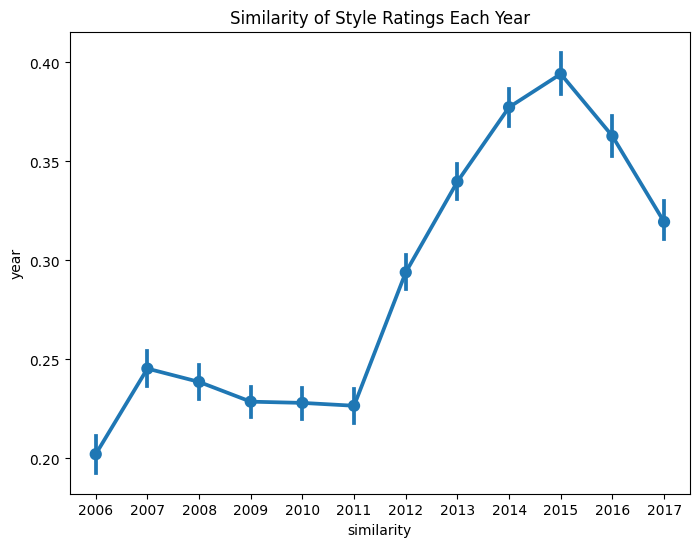

In [469]:
style_similarity_ratings = compute_similarity_countries (style_ratings_by_year, jaccard_flag = True)
plot_similarity_evolution(style_similarity_ratings)


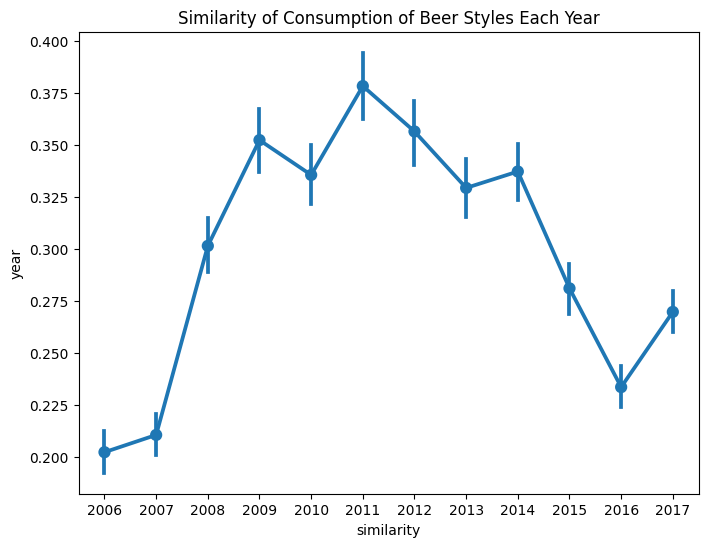

In [470]:
#Style popularity by year

style_similarity_popularity = compute_similarity_countries(style_popularities_by_year, jaccard_flag = True)
plot_similarity_evolution(style_similarity_popularity)

In [471]:
mean_global_similarity_popularity =compute_similarity_to_global (style_popularities_by_year, global_style_popularities_by_year, jaccard_flag = True)
mean_global_similarity_popularity

,Country 1,Similarity - 2006,Similarity - 2007,Similarity - 2008,Similarity - 2009,Similarity - 2010,Similarity - 2011,Similarity - 2012,Similarity - 2013,Similarity - 2014,Similarity - 2015,Similarity - 2016,Similarity - 2017
0,Australia,0.5,0.5,0.5,0.5,0.2,0.2,0.2,1.0,1.0,0.2,0.2,0.5
1,Belgium,0.2,0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2
2,Brazil,0.5,0.5,1.0,0.5,1.0,0.5,0.2,0.2,0.2,0.0,0.0,0.0
3,Canada,0.2,0.5,0.5,0.2,0.5,0.2,0.5,0.5,0.5,0.2,0.2,0.0
4,Croatia,0.5,0.5,0.5,0.5,0.5,0.5,0.2,0.2,0.2,0.2,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"United States, Virginia",0.0,0.0,0.0,0.2,0.0,0.2,0.5,0.2,0.2,0.5,0.5,0.5
67,"United States, Washington",0.0,0.0,0.2,0.2,0.0,0.2,0.5,0.2,0.2,0.5,0.5,0.5
68,"United States, West Virginia",0.0,0.2,0.2,0.2,0.2,0.5,0.5,0.2,0.2,0.2,0.0,0.0
69,"United States, Wisconsin",0.0,0.0,0.0,0.2,0.0,0.2,0.5,0.0,0.2,0.5,0.5,0.5


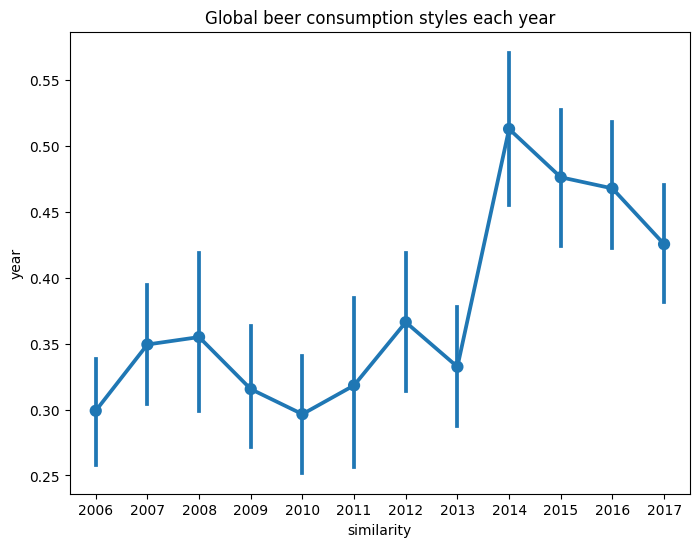

In [472]:
mean_global_similarity_ratings = compute_similarity_to_global (style_ratings_by_year, global_style_highest_rated_by_year, jaccard_flag = True)
plot_similarity_evolution(mean_global_similarity_ratings)

In [473]:
loc = breweries['location'].unique()

In [474]:
# We get the locations of all brewery latitudes and longitudes and store in the dictionary

brewery_latitudes_longitudes = []
my_map = folium.Map(location = [20, 0], zoom_start = 3)
for location in loc:
    try:
        res = geocode_location(location)
    except:
        continue
    if res:
        lat,long = res
        brewery_latitudes_longitudes.append([lat, long])



In [475]:
ll_dict = dict(zip(loc, brewery_latitudes_longitudes))

In [554]:
brewery_similarity_popularity = compute_similarity_countries(bc_popularities_by_year, jaccard_flag = False)



,Country 1,Country 2,Similarity - 2006,Similarity - 2007,Similarity - 2008,Similarity - 2009,Similarity - 2010,Similarity - 2011,Similarity - 2012,Similarity - 2013,Similarity - 2014,Similarity - 2015,Similarity - 2016,Similarity - 2017
0,Australia,Belgium,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055
1,Australia,Brazil,0.000056,0.000055,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056
2,Australia,Canada,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012
3,Australia,Croatia,0.000055,0.000055,0.000098,0.00023,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000087,0.000087
4,Australia,Denmark,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,"United States, Washington","United States, Wisconsin",0.00034,0.00034,0.00034,0.00034,0.00034,0.00034,0.00034,0.00034,0.00034,0.000373,0.000373,0.000373
2481,"United States, Washington","United States, Wyoming",0.00022,0.00022,0.000888,0.001,0.00022,0.001,0.001,0.001,0.001,0.000755,0.00023,0.00023
2482,"United States, West Virginia","United States, Wisconsin",0.000337,0.000337,0.00034,0.000408,0.00034,0.00034,0.00034,0.00034,0.00034,0.00034,0.00034,0.000395
2483,"United States, West Virginia","United States, Wyoming",0.000408,0.000408,0.000888,0.000657,0.00022,0.001,0.001,0.001,0.001,0.001,0.00022,0.000365


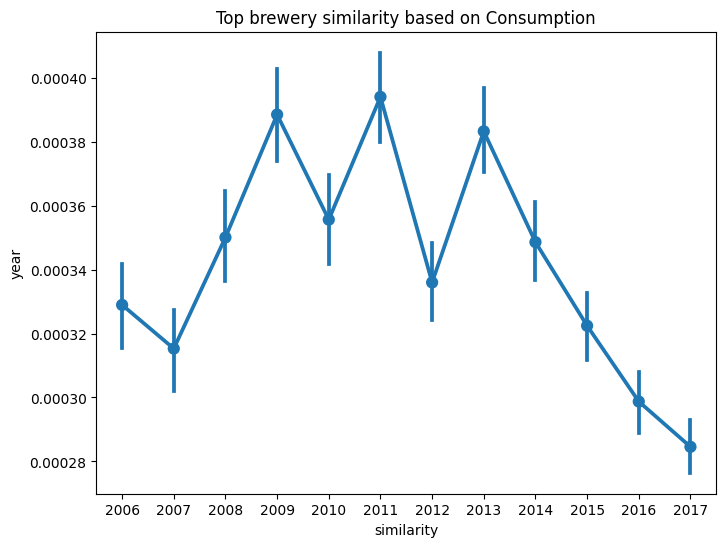

In [477]:
plot_similarity_evolution(brewery_similarity_popularity)

In [478]:
brewery_similarity_ratings=compute_similarity_countries(bc_ratings_by_year, jaccard_flag = False)

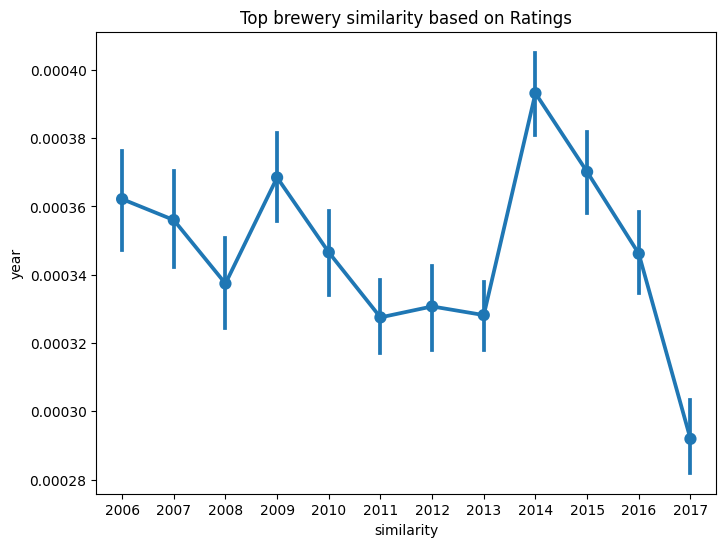

In [479]:
plot_similarity_evolution(brewery_similarity_ratings)

In [480]:
all_years_list = sorted(ratings['year'].unique())
countries = bc_ratings_by_year.index.tolist()
brewery_similarity_to_global_pop = pd.DataFrame()
for year in all_years_list:
    jaccard_similarities = []
    brewery_pop = bc_ratings_by_year[str(year)]
    global_pop = global_brewery_popularities_by_year.loc[str(year)][0][0]
    for i in range(len(brewery_pop)):
        distance = geodesic(ll_dict[brewery_pop.iloc[i]], ll_dict[global_pop]).kilometers
            
        jaccard_similarities.append((countries[i], 1/(distance+1)))

    df_jaccard = pd.DataFrame(jaccard_similarities, columns=['Country 1',  'Similarity - ' + str(year)])
    brewery_similarity_to_global_pop=pd.concat([brewery_similarity_to_global_pop, df_jaccard], axis=1)

brewery_similarity_to_global_pop
brewery_similarity_to_global_pop = brewery_similarity_to_global_pop.loc[:,~brewery_similarity_to_global_pop.columns.duplicated()]
brewery_similarity_to_global_pop

# We get the similarity between each country 




,Country 1,Similarity - 2006,Similarity - 2007,Similarity - 2008,Similarity - 2009,Similarity - 2010,Similarity - 2011,Similarity - 2012,Similarity - 2013,Similarity - 2014,Similarity - 2015,Similarity - 2016,Similarity - 2017
0,Australia,0.000073,0.000118,0.000090,0.000148,0.000070,0.000086,0.000077,0.000070,0.000116,0.000674,0.000062,0.000090
1,Belgium,0.000073,0.000189,0.000107,0.000134,0.000073,0.000070,0.000075,0.000116,0.000073,0.000189,0.000084,0.000105
2,Brazil,0.000089,0.000164,0.000091,0.000089,1.000000,0.000073,1.000000,0.000081,0.000074,0.000428,0.000074,0.000090
3,Canada,0.000077,0.000148,0.000085,0.000148,0.000070,0.000070,0.000081,0.000073,0.000116,0.000261,0.000073,0.000072
4,Croatia,1.000000,0.000089,0.000371,0.000108,0.000091,0.000102,1.000000,0.000091,0.000070,0.000674,0.000070,0.000090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"United States, Virginia",0.000075,0.000151,0.000085,0.000148,0.000071,0.000077,0.000077,0.000073,0.000073,0.000674,0.000073,0.000072
67,"United States, Washington",0.000075,0.000148,0.000085,0.000148,0.000081,0.000073,1.000000,0.000073,0.000073,0.000189,0.000073,0.000096
68,"United States, West Virginia",0.000083,0.000089,0.000107,0.000089,1.000000,1.000000,0.000086,1.000000,1.000000,0.000436,1.000000,0.000090
69,"United States, Wisconsin",0.000080,0.000148,0.000085,0.000137,0.000070,0.000070,0.000070,0.000073,0.000073,0.000806,0.000073,0.000090


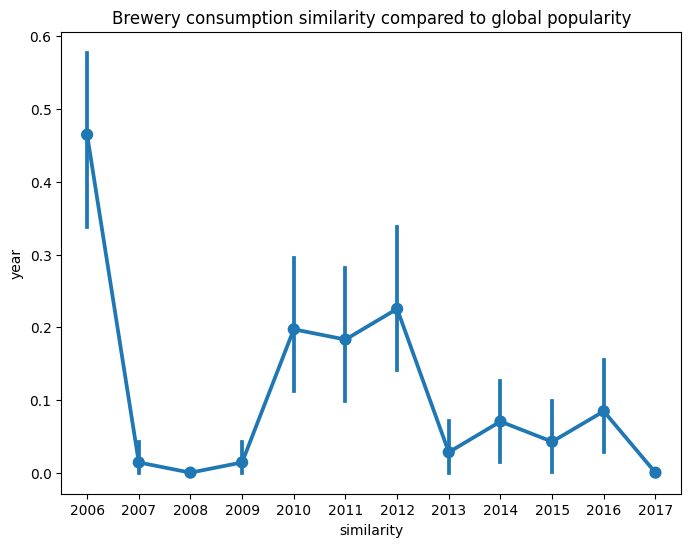

In [481]:
plot_similarity_evolution(brewery_similarity_to_global_pop)

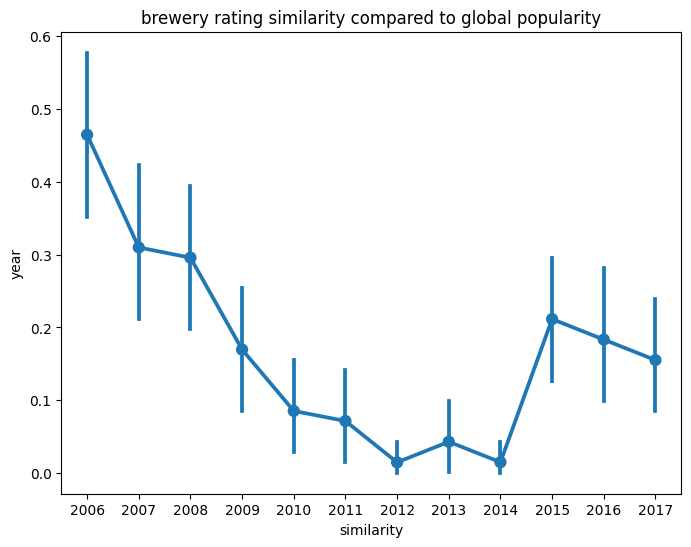

In [482]:
plot_similarity_evolution(brewery_similarity_to_global_ratings)

SAME THING WITH GROUPING

In [483]:
us_state_populations = pd.read_csv('dataset/AdditionalData/US_state_populations.csv')
world_population = pd.read_csv("dataset/AdditionalData/world_population.csv")

#Contacenating the two datasets into one and creating a location-population dictionary:

us_state_populations.rename(columns = {'states': 'location'}, inplace = True)
populations_by_location = pd.concat([us_state_populations, world_population], ignore_index = True)
populations_by_location_dict = dict(zip(populations_by_location['location'], populations_by_location['2010']))

#Finding the portion (as percentage) of population for each location that are users in either of the websites. Then, we print the list of locations that are not present in the additional datasets. We see that all the locations are very small countries, so that exclusion of them will not be significant for our future analysis.

num_users_by_location = users['location'].value_counts().reset_index()
percentage_users_by_location = []
missing_locations = []
for index, row in num_users_by_location.iterrows():
    location = row['location']
    if location in populations_by_location_dict:
        percentage_users_by_location.append({'location': location, 'percentage': 100 * row['count'] / populations_by_location_dict[location], 'population': populations_by_location_dict[location], 'users': row['count']})
    else:
        missing_locations.append(location)

percentage_users_by_location = pd.DataFrame(percentage_users_by_location)

# Gets the percentage users by location


In [484]:
# Gets the latitude and longitude for each of our final locations in degrees
from geopy.geocoders import Nominatim
print(len(percentage_users_by_location['location'].tolist()))
latitudes_longitudes = {}
geolocator = Nominatim(user_agent="my_geocoder")
for location in percentage_users_by_location['location'].tolist():
    geocode_location = geolocator.geocode(location)
    if geocode_location:
        latitudes_longitudes[location] = (geocode_location.latitude, geocode_location.longitude)



71


In [485]:
import math

# Function taken from GeeksForGeeks
def haversine(lat1, lon1, lat2, lon2):
     
    
    dLat = (lat2 - lat1) * math.pi / 180.0 # Get distance between each of the lats and longs and convert to radians
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formula
    a = (pow(math.sin(dLat / 2), 2) + pow(math.sin(dLon / 2), 2) * math.cos(lat1) * math.cos(lat2));
    RADIUS = 6371 # Approximate radius of the earth in kilometers
    c = 2 * math.asin(math.sqrt(a))
    return RADIUS * c

In [486]:
# Create a dictionary and dataframe of the distances between any two locations using the haversine formula for distance 
location_distances_dict = {}
for first_location in latitudes_longitudes:
    location_distances_dict[first_location] = {}
    for second_location in latitudes_longitudes:
        if first_location == second_location:
            location_distances_dict[first_location][second_location] = 0
        if first_location != second_location:
            location_distances_dict[first_location][second_location] = haversine(latitudes_longitudes[first_location][0], latitudes_longitudes[first_location][1], latitudes_longitudes[second_location][0], latitudes_longitudes[second_location][1])

location_df = pd.DataFrame(location_distances_dict)
location_df

,"United States, California","United States, Pennsylvania","United States, New York","United States, Illinois","United States, Massachusetts","United States, Texas",Canada,"United States, Ohio","United States, Florida","United States, Michigan",...,"United States, Idaho","United States, Montana","United States, Alaska","United States, Hawaii","United States, North Dakota",Croatia,"United States, Wyoming",Northern Ireland,Iceland,Luxembourg
"United States, California",0.000000,3552.326937,3866.530542,2571.153846,4004.951531,1954.634315,2812.838572,3142.853522,3621.002712,2973.162506,...,870.428190,1403.352094,3702.099324,4032.957678,1922.491698,9809.535181,1192.887907,7968.884605,6825.690648,8996.221170
"United States, Pennsylvania",3552.326937,0.000000,314.369078,993.585872,498.189881,2150.884632,3025.700794,426.837717,1508.313085,643.204125,...,2974.961765,2622.285872,5134.699500,7583.233908,1951.333105,7138.588192,2462.128103,5256.793895,4550.129771,6283.974104
"United States, New York",3866.530542,314.369078,0.000000,1306.692620,247.576832,2433.926491,3220.710307,736.134907,1593.888355,936.620365,...,3280.879398,2915.022482,5335.381819,7897.019052,2238.177769,6909.851327,2770.694878,5041.720210,4400.658672,6058.185004
"United States, Illinois",2571.153846,993.585872,1306.692620,0.000000,1474.793721,1278.479719,2655.051895,573.396291,1553.439906,556.547317,...,2065.923217,1807.634735,4655.709614,6604.023708,1220.976690,7944.368427,1542.704390,6043.701727,5182.091791,7088.360485
"United States, Massachusetts",4004.951531,498.189881,247.576832,1474.793721,0.000000,2648.404725,3164.284000,921.058727,1835.719781,1036.934358,...,3379.745456,2984.625316,5275.993126,8025.753028,2301.717359,6667.541498,2879.906976,4796.463884,4155.345062,5815.078240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Croatia,9809.535181,7138.588192,6909.851327,7944.368427,6667.541498,9221.280638,7144.271882,7512.481458,8369.207604,7388.272921,...,8941.350196,8406.298231,7737.615519,12735.801456,7955.243341,0.000000,8685.090899,1901.909478,2990.526292,856.532972
"United States, Wyoming",1192.887907,2462.128103,2770.694878,1542.704390,2879.906976,1544.122668,1990.217949,2083.570878,2899.720603,1843.953268,...,523.322368,494.818458,3527.162354,5152.239161,738.358360,8685.090899,0.000000,6819.513340,5723.585890,7857.088851
Northern Ireland,7968.884605,5256.793895,5041.720210,6043.701727,4796.463884,7321.337309,5418.487290,5621.109484,6549.234384,5487.378655,...,7108.492110,6571.668023,6400.770662,11238.541541,6084.188573,1901.909478,6819.513340,0.000000,1309.384846,1048.906167
Iceland,6825.690648,4550.129771,4400.658672,5182.091791,4155.345062,6446.226737,4168.367187,4851.601963,5988.399710,4634.700053,...,5955.966443,5422.670297,5098.639920,9937.407490,5005.437309,2990.526292,5723.585890,1309.384846,0.000000,2216.835411


In [507]:
def k_closest_and_farthest_locations(k, all_differences_dict): # returns the k closest locations to the current location and the k furthest locations to the current location based on differences between each location
    k_closest_locs = {}
    k_farthest_locs = {}
    for location in all_differences_dict:
        sorted_locations_by_distance = sorted(all_differences_dict[location].items(), key=lambda x:x[1])
        k_closest_locs[location] = sorted_locations_by_distance[1: k + 1]
        k_farthest_locs[location] = sorted_locations_by_distance[len(location_distances_dict) - k : len(location_distances_dict) ]
    return k_closest_locs, k_farthest_locs

In [508]:
def get_group_similarities(df_ranking, k_closest_locs, k_farthest_locs, jaccard_flag = True): 
    all_years_list = sorted(ratings['year'].unique())
    countries = df_ranking.index.tolist()
    closest_sim_tot = pd.DataFrame()
    farthest_sim_tot = pd.DataFrame()
    for year in all_years_list:
        df_ranking_year = df_ranking[str(year)]
        closest_sim = []
        farthest_sim = []
        for i in range(len(df_ranking_year)):
            k_closest = k_closest_locs[countries[i]]
            k_farthest = k_farthest_locs[countries[i]]
            for loc in (k_closest) : 
                distance = jaccard(df_ranking_year.iloc[i],df_ranking_year[loc[0]])
                closest_sim.append(distance)
            
            for loc in (k_farthest) : 
                distance = jaccard(df_ranking_year.iloc[i],df_ranking_year[loc[0]])
                farthest_sim.append(distance)

        df_closer= pd.DataFrame(closest_sim, columns=['Similarity Close - ' + str(year)])
        df_farthest= pd.DataFrame(farthest_sim, columns=['Similarity Far - ' + str(year)])
        
        closest_sim_tot=pd.concat([closest_sim_tot, df_closer], axis=1)
        farthest_sim_tot = pd.concat([farthest_sim_tot, df_farthest], axis=1)
    return closest_sim_tot, farthest_sim_tot

In [509]:
fifteen_closest_locations, fifteen_furthest_locations = k_closest_and_farthest_locations(15, location_distances_dict)
# We decided to use the 15 closest and furthest locations based on location differences so each location is compared to the 20% of closest locations and 20% of furthest locations

In [535]:
def plot_graph(similarity_ranking_df, title_name, closest_style_ratings, farthest_style_ratings):
    sim_col= [col for col in similarity_ranking_df.columns if col.startswith('Similarity')]
    plt.figure(figsize=(10,5))
    farthest_style_ratings.mean().plot(label='Similarity of 15 furthest locations')
    closest_style_ratings.mean().plot(label='Similarity of 15 closest locations ')
    similarity_ranking_df[sim_col].mean().plot(label='Global mean')

    plt.xlabel('Year')
    plt.ylabel('Mean Similarity of Beer preferences')
    plt.title(title_name)
    plt.legend()
    plt.show()



In [539]:
style

,Country 1,Country 2,Similarity - 2006,Similarity - 2007,Similarity - 2008,Similarity - 2009,Similarity - 2010,Similarity - 2011,Similarity - 2012,Similarity - 2013,Similarity - 2014,Similarity - 2015,Similarity - 2016,Similarity - 2017
0,Australia,Belgium,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.2,0.2,0.2,0.2,0.0
1,Australia,Brazil,0.0,0.2,0.5,0.0,0.2,0.0,0.2,0.2,0.5,0.2,0.5,0.2
2,Australia,Canada,0.2,0.5,0.5,0.5,0.5,0.2,0.5,0.5,0.5,0.5,0.5,0.2
3,Australia,Croatia,0.0,0.0,0.5,0.2,0.2,0.2,0.0,0.0,0.5,0.2,0.5,0.2
4,Australia,Denmark,0.5,1.0,1.0,0.5,0.2,0.2,0.2,0.2,0.5,0.2,0.5,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,"United States, Washington","United States, Wisconsin",0.5,0.2,0.5,0.0,0.5,0.5,0.2,0.2,1.0,1.0,0.5,0.5
2481,"United States, Washington","United States, Wyoming",0.2,0.2,0.0,0.2,0.0,0.2,0.2,0.0,0.2,0.2,0.2,0.2
2482,"United States, West Virginia","United States, Wisconsin",0.0,0.0,0.2,0.5,0.2,0.2,0.2,0.5,0.5,0.5,0.0,0.2
2483,"United States, West Virginia","United States, Wyoming",0.5,0.5,0.2,0.2,0.2,0.0,0.5,0.2,0.2,0.2,0.2,0.2


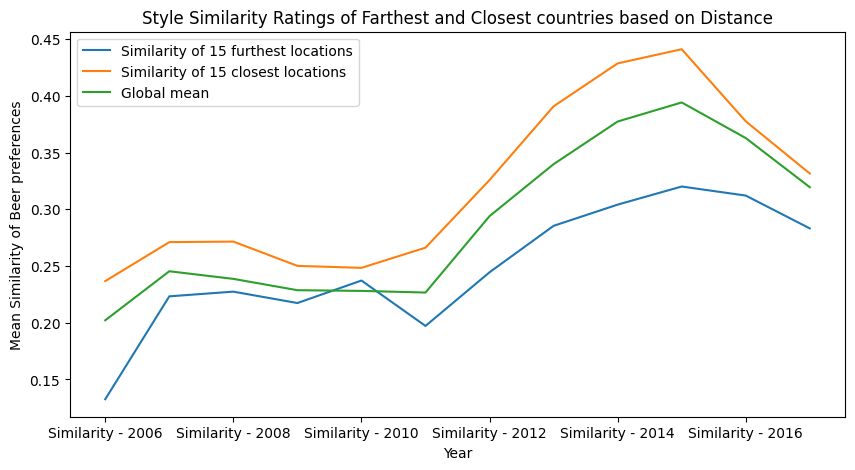

In [536]:
closest_style_ratings, farthest_style_ratings = get_group_similarities(style_ratings_by_year, k_closest_locs= fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, jaccard_flag= True)
plot_graph(style_similarity_ratings, 'Style Similarity Ratings of Farthest and Closest countries based on Distance', closest_style_ratings, farthest_style_ratings)



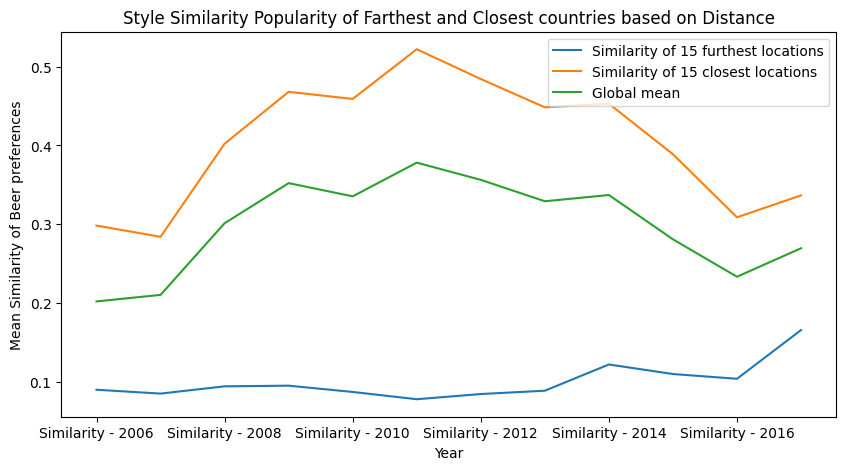

In [538]:


closest_style_ratings, farthest_style_ratings = get_group_similarities(style_popularities_by_year, k_closest_locs= fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, jaccard_flag= True)
plot_graph(style_similarity_popularity, 'Style Similarity Popularity of Farthest and Closest countries based on Distance', closest_style_ratings, farthest_style_ratings)



In [572]:
all_years_list = sorted(ratings['year'].unique())
countries = style_popularities_by_year.index.tolist()
style_similarity = pd.DataFrame()
closest_sim_tot = pd.DataFrame()
farthest_sim_tot = pd.DataFrame()
for year in all_years_list:
    jaccard_similarities = []
    style_ratings = style_popularities_by_year[str(year)]
    closest_sim = []
    farthest_sim = []
    for i in range(len(style_ratings)):
        fifteen_closest_locations = five_closest_locs[countries[i]]
        fifteen_furthest_locations= five_farthest_locs[countries[i]]
        
        for loc in (five_closest) : 
            distance = jaccard(style_ratings.iloc[i],style_ratings[loc[0]])
            closest_sim.append(distance)
        
        for loc in (five_farthest) : 
            distance = jaccard(style_ratings.iloc[i],style_ratings[loc[0]])
            farthest_sim.append(distance)

    df_closer= pd.DataFrame(closest_sim, columns=['Similarity Close - ' + str(year)])
    df_farthest= pd.DataFrame(farthest_sim, columns=['Similarity Far - ' + str(year)])
    
    closest_sim_tot=pd.concat([closest_sim_tot, df_closer], axis=1)
    farthest_sim_tot = pd.concat([farthest_sim_tot, df_farthest], axis=1)


## ***Looking at Wealth and differences of 15 closest countries vs 15 farthest countries***

In [546]:
closest_and_furthest_distance = pd.read_csv('dataset/AdditionalData/Wealth_and_Lang.csv') # Reading in our wealth dataset which has the GDP per capita for each of our locations in 2008

wealth_dict = {}
for index, row in closest_and_furthest_distance.iterrows():
    wealth_dict[row['Location']] = row['Money in 2008']

wealth_differences_dict = {} #Calculating the 
for first_location in wealth_dict:
    wealth_differences_dict[first_location] = {}
    for second_location in wealth_dict:
        wealth_differences_dict[first_location][second_location] = abs(wealth_dict[first_location] - wealth_dict[second_location])

fifteen_closest_locations, fifteen_furthest_locations = k_closest_and_farthest_locations(15, wealth_differences_dict) # Using the previous function to get the 5 closest locations and 5 furthest locations in terms of wealth

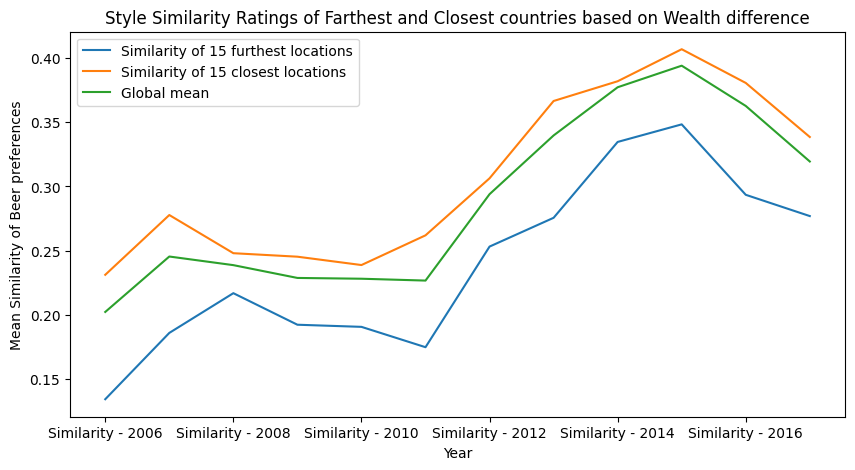

In [550]:
closest_style_ratings, farthest_style_ratings = get_group_similarities(style_ratings_by_year, k_closest_locs= fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, jaccard_flag= True)
plot_graph(style_similarity_ratings, 'Style Similarity Ratings of Farthest and Closest countries based on Wealth difference', closest_style_ratings, farthest_style_ratings)

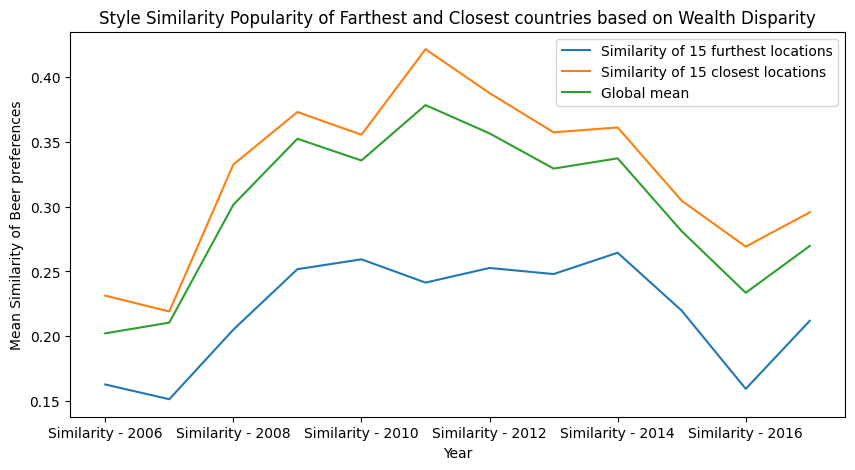

In [553]:
closest_style_ratings, farthest_style_ratings = get_group_similarities(style_popularities_by_year, k_closest_locs= fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, jaccard_flag= True)
plot_graph(style_similarity_popularity, 'Style Similarity Popularity of Farthest and Closest countries based on Wealth Disparity', closest_style_ratings, farthest_style_ratings)



In [564]:
#Do some test t test

from scipy import stats
#stats.ttest_ind(total_close, total_far)


In [573]:
for year in all_years_list:
    print(year)
    print(stats.ttest_ind(closest_sim_tot['Similarity Close - ' + str(year)], farthest_sim_tot['Similarity Far - ' + str(year)]))

2006
TtestResult(statistic=4.096127595078133, pvalue=4.686569074667289e-05, df=708.0)
2007
TtestResult(statistic=2.8341082077651403, pvalue=0.004726257663839661, df=708.0)
2008
TtestResult(statistic=7.205415297227978, pvalue=1.4854814274047335e-12, df=708.0)
2009
TtestResult(statistic=3.780357955107702, pvalue=0.00016980391547524937, df=708.0)
2010
TtestResult(statistic=8.746510068424158, pvalue=1.593426548960141e-17, df=708.0)
2011
TtestResult(statistic=12.071654549784782, pvalue=1.2105120225726552e-30, df=708.0)
2012
TtestResult(statistic=10.270914483654852, pvalue=3.656741397417182e-23, df=708.0)
2013
TtestResult(statistic=13.11822774600961, pvalue=2.3890670854331665e-35, df=708.0)
2014
TtestResult(statistic=12.032629012249375, pvalue=1.7931245331222056e-30, df=708.0)
2015
TtestResult(statistic=6.346276204350348, pvalue=3.937075058017925e-10, df=708.0)
2016
TtestResult(statistic=4.771774743289786, pvalue=2.218849550124253e-06, df=708.0)
2017
TtestResult(statistic=4.166159422198312, 

Our p value being extremely low when comparing the 15 closest locations vs the 15 furthest locations shows that the differences we analyzed is significantly significant when analyzing two countries beer preferences in relation to each other

DIVISION BY GROUP

In [566]:
beer_styles_dict = {'Wheat Beer': ['German Hefeweizen', 'Dunkelweizen', 'Witbier', 'Berliner Weisse', 'Grodziskie/Gose/Lichtenhainer', 'German Kristallweizen', 'Wheat Ale'], 'Lambic & Sour Ale': ['Sour/Wild Ale', 'Fruit Beer', 'Lambic Style - Fruit', 'Lambic Style - Gueuze', 'Lambic Style - Unblended', 'Lambic Style - Faro', 'Sour Red/Brown'], 'Belgian Ale': ['Abbey Tripel', 'Belgian Ale', 'Belgian Strong Ale', 'Abbey Dubbel', 'Abt/Quadrupel', 'Bière de Garde', 'Saison'], 'Pale Ale': ['Golden Ale/Blond Ale', 'American Pale Ale', 'India Pale Ale (IPA)', 'Black IPA', 'Amber Ale', 'Imperial IPA', 'Irish Ale'], 'Bitter': ['Bitter', 'Premium Bitter/ESB'], 'Scottish Ale': ['Scotch Ale', 'Scottish Ale'], 'Brown Ale': ['Mild Ale', 'Brown Ale', 'American Strong Ale ', 'English Strong Ale', 'Old Ale'], 'Porter': ['Porter', 'Baltic Porter'], 'Stout': ['Stout', 'Sweet Stout', 'Dry Stout', 'Foreign Stout', 'Imperial Stout'], 'Pilsener': ['Pilsener', 'Dortmunder/Helles'], 'Lager': ['Imperial Pils/Strong Pale Lager', 'Pale Lager', 'Amber Lager/Vienna', 'Schwarzbier', 'Altbier', 'Zwickel/Keller/Landbier', 'Dunkel/Tmavý'], 'Bock': ['Doppelbock', 'Dunkler Bock', 'Eisbock', 'Heller Bock', 'Weizen Bock'], 'American Special': ['Cream Ale', 'California Common'], 'Alternative/Traditional': ['Sahti/Gotlandsdricke/Koduõlu', 'Mead', 'Malt Liquor', 'Low Alcohol', 'Specialty Grain', 'Spice/Herb/Vegetable', 'Oktoberfest/Märzen', 'Smoked', 'Barley Wine', 'Kölsch', 'Traditional Ale']}

inverted_beer_styles_dict = {}

for key, values in beer_styles_dict.items():
    for value in values:
        inverted_beer_styles_dict[value] = key

location_list_2 = pd.unique(users.location)
location_set = set( location_list_2.tolist())
us_locations = [location for location in list(location_set) if 'United States' in location]
location_dict = {'Northern Europe': ['Denmark', 'Estonia', 'Finland', 'Iceland', 'Norway', 'Sweden', 'Luxembourg'], 'Central/Western Europe': ['France', 'Germany', 'Ireland', 'Netherlands', 'Belgium', 'Switzerland', 'Czech Republic'], 'Southern Europe': ['Italy', 'Spain', 'Croatia'], 'Eastern Europe': ['Poland', 'Russia'], 'United Kingdom': ['England', 'Scotland', 'Northern Ireland'], 'North America': us_locations + ['Canada'], 'Central and South America': ['Brazil', 'Trinidad & Tobago'], 'Oceania': ['Australia', 'New Zealand']}

inverted_location_dict = {}

for key, values in location_dict.items():
    for value in values:
        inverted_location_dict[value] = key

In [567]:
#Iterate over the years
#Iterate over the groups
#Iterate for each country of each group (do pair-wise within group)
location_keys = list(location_dict.keys())
print(location_keys)



['Northern Europe', 'Central/Western Europe', 'Southern Europe', 'Eastern Europe', 'United Kingdom', 'North America', 'Central and South America', 'Oceania']


In [568]:
location_dict['Northern Europe']

['Denmark', 'Estonia', 'Finland', 'Iceland', 'Norway', 'Sweden', 'Luxembourg']

In [574]:
#Groups of neighbouring countries

all_years_list = sorted(ratings['year'].unique())
pairwise_similarity = pd.DataFrame()
for year in all_years_list:
    df_ranking_year = style_ratings_by_year[str(year)]
    similarities = []
    for group in location_keys :
        print(group) 
        countries = location_dict[group]
        sim_tmp = []
        for i in range(len(countries)):
            for j in range(i+1, len(countries)):
               
                if (countries[i] in df_ranking_year.index) and (countries[j] in df_ranking_year.index):
                    
                    similarity = jaccard(df_ranking_year.loc[countries[i]],df_ranking_year.loc[countries[j]])
                    
                    sim_tmp .append(similarity)
        similarities.append((np.mean(sim_tmp)))
        print(similarities)
    df_similarities = pd.DataFrame(
    {'Group': location_keys,
     'Similarity - ' + str(year): similarities
    })

    pairwise_similarity=pd.concat([pairwise_similarity, df_similarities], axis=1)
    pairwise_similarity = pairwise_similarity.T.drop_duplicates().T
    
    
 

Northern Europe
[0.24000000000000002]
Central/Western Europe
[0.24000000000000002, 0.09333333333333334]
Southern Europe
[0.24000000000000002, 0.09333333333333334, 0.3]
Eastern Europe
[0.24000000000000002, 0.09333333333333334, 0.3, nan]
United Kingdom
[0.24000000000000002, 0.09333333333333334, 0.3, nan, 0.06666666666666667]
North America
[0.24000000000000002, 0.09333333333333334, 0.3, nan, 0.06666666666666667, 0.26448979591836735]
Central and South America
[0.24000000000000002, 0.09333333333333334, 0.3, nan, 0.06666666666666667, 0.26448979591836735, nan]
Oceania
[0.24000000000000002, 0.09333333333333334, 0.3, nan, 0.06666666666666667, 0.26448979591836735, nan, 0.0]
Northern Europe
[0.3533333333333334]
Central/Western Europe
[0.3533333333333334, 0.15]
Southern Europe
[0.3533333333333334, 0.15, 0.16666666666666666]
Eastern Europe
[0.3533333333333334, 0.15, 0.16666666666666666, nan]
United Kingdom
[0.3533333333333334, 0.15, 0.16666666666666666, nan, 0.06666666666666667]
North America
[0.35

c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar 

[0.2800000000000001, 0.49000000000000005, 0.5, nan, 0.3, 0.42138775510204085]
Central and South America
[0.2800000000000001, 0.49000000000000005, 0.5, nan, 0.3, 0.42138775510204085, nan]
Oceania
[0.2800000000000001, 0.49000000000000005, 0.5, nan, 0.3, 0.42138775510204085, nan, 0.2]
Northern Europe
[0.45333333333333337]
Central/Western Europe
[0.45333333333333337, 0.32]
Southern Europe
[0.45333333333333337, 0.32, 0.3]
Eastern Europe
[0.45333333333333337, 0.32, 0.3, nan]
United Kingdom
[0.45333333333333337, 0.32, 0.3, nan, 0.5]
North America
[0.45333333333333337, 0.32, 0.3, nan, 0.5, 0.4370612244897959]
Central and South America
[0.45333333333333337, 0.32, 0.3, nan, 0.5, 0.4370612244897959, nan]
Oceania
[0.45333333333333337, 0.32, 0.3, nan, 0.5, 0.4370612244897959, nan, 0.0]
Northern Europe
[0.32000000000000006]
Central/Western Europe
[0.32000000000000006, 0.4]
Southern Europe
[0.32000000000000006, 0.4, 0.20000000000000004]
Eastern Europe
[0.32000000000000006, 0.4, 0.20000000000000004, n

c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rishi\anaconda3\envs\ada\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar 

In [571]:
pairwise_similarity # Getting the pairwise similarity for each of the groups of countries based on ratings of style

,Group,Similarity - 2006,Similarity - 2007,Similarity - 2008,Similarity - 2009,Similarity - 2010,Similarity - 2011,Similarity - 2012,Similarity - 2013,Similarity - 2014,Similarity - 2015,Similarity - 2016,Similarity - 2017
0,Northern Europe,0.24,0.353333,0.44,0.14,0.133333,0.14,0.14,0.273333,0.28,0.453333,0.32,0.453333
1,Central/Western Europe,0.093333,0.15,0.28,0.38,0.35,0.21,0.44,0.43,0.49,0.32,0.4,0.35
2,Southern Europe,0.3,0.166667,0.3,0.166667,0.3,0.4,0.233333,0.3,0.5,0.3,0.2,0.4
3,Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,0.066667,0.066667,0.066667,0.066667,0.166667,0.3,0.466667,0.133333,0.3,0.5,0.3,0.4
5,North America,0.26449,0.269959,0.26049,0.254122,0.241796,0.257878,0.325061,0.374204,0.421388,0.437061,0.396408,0.325959
6,Central and South America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Oceania,0.0,0.2,0.0,0.2,0.5,0.2,0.2,0.2,0.2,0.0,0.2,0.0


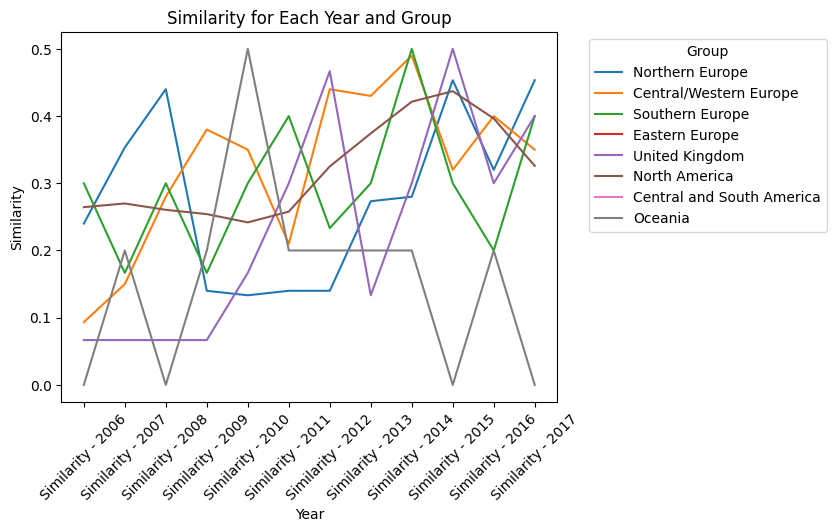

In [575]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the dataframe to have years as columns
pairwise_similarity_transposed = pairwise_similarity.set_index('Group').T

# Plotting the lines for each group
for group in location_keys:
    sns.lineplot(data=pairwise_similarity_transposed[group], label=group)
plt.xlabel('Year')
plt.ylabel('Similarity')
plt.title('Similarity for Each Year and Group')

plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#There seem to be no specific trend...

TODO: Same with different groups of wealth

VIZUALIZATION WITH CHORD


In [577]:
!pip install holoviews

  Obtaining dependency information for holoviews from https://files.pythonhosted.org/packages/dc/25/8f22bc587eb77f399c5d3218b9743298ee7f0eedd937c6169d5a6b4db09e/holoviews-1.18.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for param<3.0,>=1.12.0 from https://files.pythonhosted.org/packages/2c/7c/bbb850b1368f4a2d51bccaf7d6c9acc2f1d7c5ee97f7f7cca1c62b1bf23b/param-2.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyviz-comms>=0.7.4 from https://files.pythonhosted.org/packages/67/bc/f698554d2a179c3ae40adba328db1bc552c0ea5832101503200ab1904dd8/pyviz_comms-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for panel>=1.0 from https://files.pythonhosted.org/packages/24/65/51277abc4b480bccd4a96c07c5e180f21851c0c5c3798a7d4959ad85f27d/panel-1.3.4-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
     ---- ----------------------------------- 0.2/1.7 MB 5.3 MB/s eta 0:00:01
     ------------

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
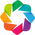

In [579]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)

In [ ]:
beer_styles_dict = {'Wheat Beer': ['German Hefeweizen', 'Dunkelweizen', 'Witbier', 'Berliner Weisse', 'Grodziskie/Gose/Lichtenhainer', 'German Kristallweizen', 'Wheat Ale'], 'Lambic & Sour Ale': ['Sour/Wild Ale', 'Fruit Beer', 'Lambic Style - Fruit', 'Lambic Style - Gueuze', 'Lambic Style - Unblended', 'Lambic Style - Faro', 'Sour Red/Brown'], 'Belgian Ale': ['Abbey Tripel', 'Belgian Ale', 'Belgian Strong Ale', 'Abbey Dubbel', 'Abt/Quadrupel', 'Bière de Garde', 'Saison'], 'Pale Ale': ['Golden Ale/Blond Ale', 'American Pale Ale', 'India Pale Ale (IPA)', 'Black IPA', 'Amber Ale', 'Imperial IPA', 'Irish Ale'], 'Bitter': ['Bitter', 'Premium Bitter/ESB'], 'Scottish Ale': ['Scotch Ale', 'Scottish Ale'], 'Brown Ale': ['Mild Ale', 'Brown Ale', 'American Strong Ale ', 'English Strong Ale', 'Old Ale'], 'Porter': ['Porter', 'Baltic Porter'], 'Stout': ['Stout', 'Sweet Stout', 'Dry Stout', 'Foreign Stout', 'Imperial Stout'], 'Pilsener': ['Pilsener', 'Dortmunder/Helles'], 'Lager': ['Imperial Pils/Strong Pale Lager', 'Pale Lager', 'Amber Lager/Vienna', 'Schwarzbier', 'Altbier', 'Zwickel/Keller/Landbier', 'Dunkel/Tmavý'], 'Bock': ['Doppelbock', 'Dunkler Bock', 'Eisbock', 'Heller Bock', 'Weizen Bock'], 'American Special': ['Cream Ale', 'California Common'], 'Alternative/Traditional': ['Sahti/Gotlandsdricke/Koduõlu', 'Mead', 'Malt Liquor', 'Low Alcohol', 'Specialty Grain', 'Spice/Herb/Vegetable', 'Oktoberfest/Märzen', 'Smoked', 'Barley Wine', 'Kölsch', 'Traditional Ale']}

inverted_beer_styles_dict = {}

for key, values in beer_styles_dict.items():
    for value in values:
        inverted_beer_styles_dict[value] = key



In [580]:

location_list_2 = pd.unique(users.location)
location_set = set( location_list_2.tolist())
us_locations = [location for location in list(location_set) if 'United States' in location]
location_dict = {'Northern Europe': ['Denmark', 'Estonia', 'Finland', 'Iceland', 'Norway', 'Sweden'], 'Central/Western Europe': ['France', 'Germany', 'Ireland', 'Netherlands', 'Belgium', 'Switzerland', 'Czech Republic'], 'Southern Europe': ['Italy', 'Spain', 'Croatia'], 'Eastern Europe': ['Poland', 'Russia'], 'United Kingdom': ['England', 'Scotland', 'Northern Ireland'], 'North America': us_locations + ['Canada'], 'Central and South America': ['Brazil', 'Trinidad & Tobago'], 'Oceania': ['Australia', 'New Zealand']}

inverted_location_dict = {}

for key, values in location_dict.items():
    for value in values:
        inverted_location_dict[value] = key

In [581]:
inverted_location_dict_values = list(inverted_location_dict.values())


c = pd.DataFrame(inverted_location_dict_values, columns = ['nodes'])

In [ ]:
c

,nodes
0,Northern Europe
1,Northern Europe
2,Northern Europe
3,Northern Europe
4,Northern Europe
...,...
70,North America
71,Central and South America
72,Central and South America
73,Oceania


In [582]:
c = c.drop_duplicates().reset_index(drop=True)


In [ ]:
c

,nodes
0,Northern Europe
1,Central/Western Europe
2,Southern Europe
3,Eastern Europe
4,United Kingdom
5,North America
6,Central and South America
7,Oceania


In [583]:
#With Jaccard weights

df_test=compute_similarity_countries(style_ratings_by_year, jaccard_flag = True)

In [584]:
#For now, just for one year

df_jaccard = df_test[['Country 1', 'Country 2', 'Similarity - 2006']]
df_jaccard.rename(columns={'Country 1': 'source', 'Country 2': 'target', 'Similarity - 2006': 'weight'}, inplace=True)
df_jaccard[['source', 'target', 'weight']]


C:\Users\rishi\AppData\Local\Temp\ipykernel_5356\3333802182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jaccard.rename(columns={'Country 1': 'source', 'Country 2': 'target', 'Similarity - 2006': 'weight'}, inplace=True)


,source,target,weight
0,Australia,Belgium,0.5
1,Australia,Brazil,0.0
2,Australia,Canada,0.2
3,Australia,Croatia,0.0
4,Australia,Denmark,0.5
...,...,...,...
2480,"United States, Washington","United States, Wisconsin",0.5
2481,"United States, Washington","United States, Wyoming",0.2
2482,"United States, West Virginia","United States, Wisconsin",0.0
2483,"United States, West Virginia","United States, Wyoming",0.5


In [585]:
df_jaccard = df_jaccard.replace(inverted_location_dict)

In [586]:
df_jaccard

,source,target,weight
0,Oceania,Central/Western Europe,0.5
1,Oceania,Central and South America,0.0
2,Oceania,North America,0.2
3,Oceania,Southern Europe,0.0
4,Oceania,Northern Europe,0.5
...,...,...,...
2480,North America,North America,0.5
2481,North America,North America,0.2
2482,North America,North America,0.0
2483,North America,North America,0.5


In [587]:
df_jaccard = df_jaccard[df_jaccard['weight'] != 0]


In [588]:
str_to_int = dict(zip(c['nodes'], c.index))
df_jaccard['source'] = df_jaccard['source'].replace(str_to_int)
df_jaccard['target'] = df_jaccard['target'].replace(str_to_int)
df_jaccard.replace("Luxembourg", 0, inplace=True)


C:\Users\rishi\AppData\Local\Temp\ipykernel_5356\2091759468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jaccard['source'] = df_jaccard['source'].replace(str_to_int)
C:\Users\rishi\AppData\Local\Temp\ipykernel_5356\2091759468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jaccard['target'] = df_jaccard['target'].replace(str_to_int)
C:\Users\rishi\AppData\Local\Temp\ipykernel_5356\2091759468.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

In [ ]:
#Get the sum of weight normalized by the number of countries

sum_weight_jaccard = (df_jaccard.groupby(['source', 'target'])['weight'].sum()/df_jaccard.groupby(['source', 'target'])['weight'].count()).reset_index()



In [589]:
nodes = hv.Dataset(pd.DataFrame(c['nodes']), 'index')
chord = hv.Chord((sum_weight_jaccard,nodes )).select(value=(5, None))
chord.opts(
           opts.Chord(cmap='Category20', edge_cmap='Category20',                              edge_color=dim('source').str(), 
           labels='nodes', node_color=dim('index').str(), edge_line_width=dim('weight')*20, edge_line_alpha=0.5, edge_selection_line_color='black', edge_hover_line_color='black', node_selection_fill_color='black', node_hover_fill_color='black', node_size=10))

NameError: name 'sum_weight_jaccard' is not defined